In [184]:
import json
import os
import sqlite3

import matplotlib.pyplot as plt

In [185]:

version = 9
params_path = f'results/reconstruction_experiment_inc_noise/material_reconstruction/version_{version}/params.json'

In [186]:
with open(params_path, 'r') as fp:
        params_dict = json.load(fp)
value_db_path = os.path.join(params_dict['result_dir'], 'values.db')

In [187]:
connection = sqlite3.connect(value_db_path)
cursor = connection.cursor()

In [188]:
cursor.execute("SELECT * from reconstruction_experiment_inc_noise_metrics")
psnr, psnr_deg, ssim, ssim_deg, lam = zip(*cursor.fetchall())

In [198]:
cursor.execute("SELECT lam, MAX(ssim) from reconstruction_experiment_inc_noise_metrics")
max_point_ssim = cursor.fetchone()
print(f'Max SSIM was calculated at', max_point_ssim)

Max was calculated at (0.5862068965517241, 0.8379208554641189)


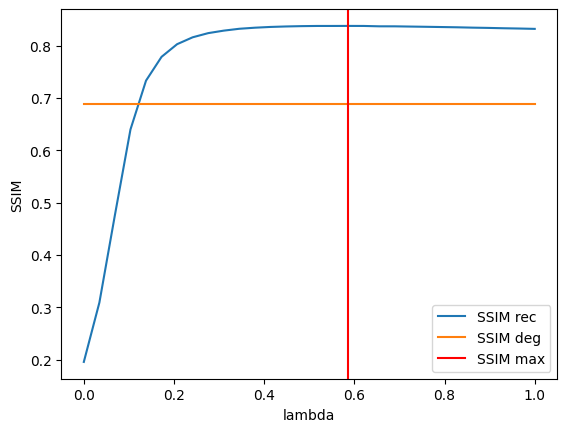

In [204]:
plt.plot(lam, ssim, label='SSIM rec')
plt.plot(lam, ssim_deg, label='SSIM deg')
plt.axvline(max_point_ssim[0], color='r', label='SSIM max')
plt.xlabel('lambda')
plt.ylabel('SSIM')
plt.legend()
plt.show()

In [202]:
cursor.execute("SELECT lam, MAX(psnr) from reconstruction_experiment_inc_noise_metrics")
max_point_psnr = cursor.fetchone()
print(f'Max PSNR was calculated at', max_point_psnr)

Max PSNR was calculated at (0.6206896551724138, 27.381693763697754)


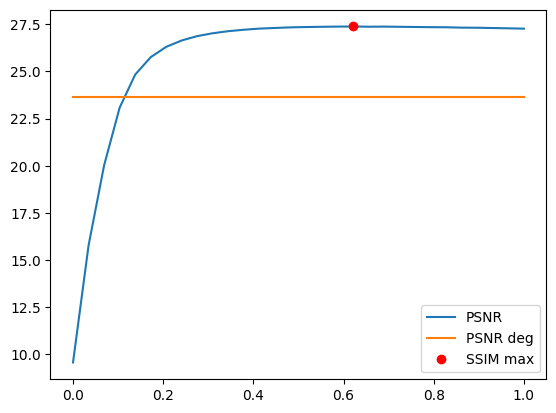

In [197]:
plt.plot(lam, psnr, label='PSNR')
plt.plot(lam, psnr_deg, label='PSNR deg')
plt.plot(*max_point_psnr, 'ro', label='SSIM max')
plt.legend()
plt.show()